In [548]:
# 1 - Import necessary libraries
import pandas as pd
import os
import random as rd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

In [549]:
print(os.name)
os.getcwd()

nt


'C:\\Users\\baris\\Desktop\\DATA 602\\Project\\Yahoo_fantasy_basketball_analyzer-master\\Yahoo_fantasy_basketball_analyzer-master\\yahoo_fantasy_basketball_analyzer\\machine_learning\\data\\2018\\player'

In [550]:
files = os.listdir('C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player')
file_list = []
for element in files:
    if element.endswith(".csv"):
        file_list.append(element) 

len(file_list)

530

In [551]:
# choose a random player to analyze
x = rd.randint(0,530)
file_list[x]


'Kyle Lowry.csv'

In [552]:
path = "C:/Users/baris/Desktop/DATA 602/Project/Yahoo_fantasy_basketball_analyzer-master/Yahoo_fantasy_basketball_analyzer-master/yahoo_fantasy_basketball_analyzer/machine_learning/data/2018/player"
df = pd.read_csv(path+"/"+str(file_list[x]), usecols=["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      65 non-null     object 
 1   FG%     65 non-null     float64
 2   FT%     53 non-null     float64
 3   TRB     65 non-null     int64  
 4   AST     65 non-null     int64  
 5   STL     65 non-null     int64  
 6   BLK     65 non-null     int64  
 7   TOV     65 non-null     int64  
 8   PTS     65 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.7+ KB


In [553]:
# Putting zero(0) value for non-values
df = df.fillna(0)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      65 non-null     object 
 1   FG%     65 non-null     float64
 2   FT%     65 non-null     float64
 3   TRB     65 non-null     int64  
 4   AST     65 non-null     int64  
 5   STL     65 non-null     int64  
 6   BLK     65 non-null     int64  
 7   TOV     65 non-null     int64  
 8   PTS     65 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.7+ KB


**Explanation of the abbreviations:**
- MP = Minutes Played
- FG% = Field Goal Percentage 
- FT% = Free Throw Percentage 
- TRB = Total Rebound 
- AST = Assist 
- STL = Steal 
- BLK = Block 
- TOV = Turnover
- PTS = Points

In [554]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,35:35,0.833,0.667,1,8,1,1,3,27
1,34:19,0.625,0.500,6,6,0,0,0,15
2,34:46,0.476,1.000,3,12,1,1,4,28
3,31:49,0.556,1.000,2,14,2,1,1,16
4,34:56,0.444,1.000,6,10,4,0,6,13


In [555]:
df['MP'] = df['MP'].astype(str).str[0:2].str.replace(":","")
# df['MP'].str.split(":")[0][0]


In [556]:
# getting only minutes and removing seconds from MP(minutes played) column
# df['MP'] = df['MP'].astype(str).str[0:2]
df['MP'] = df['MP'].apply(int)
df['MP']

0     35
1     34
2     34
3     31
4     34
      ..
60    28
61    26
62    33
63    36
64    42
Name: MP, Length: 65, dtype: int64

In [557]:
# print(file_list[x])
df

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,35,0.833,0.667,1,8,1,1,3,27
1,34,0.625,0.500,6,6,0,0,0,15
2,34,0.476,1.000,3,12,1,1,4,28
3,31,0.556,1.000,2,14,2,1,1,16
4,34,0.444,1.000,6,10,4,0,6,13
...,...,...,...,...,...,...,...,...,...
60,28,0.200,0.833,7,8,4,0,3,10
61,26,0.500,0.750,6,7,3,1,0,12
62,33,0.273,1.000,5,4,0,0,0,10
63,36,0.462,1.000,5,11,0,0,3,16


In [558]:
df.head()

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,35,0.833,0.667,1,8,1,1,3,27
1,34,0.625,0.500,6,6,0,0,0,15
2,34,0.476,1.000,3,12,1,1,4,28
3,31,0.556,1.000,2,14,2,1,1,16
4,34,0.444,1.000,6,10,4,0,6,13


# Hypothesis 

H0: There is no difference in the accuracy or performance among the models selected

H1: There is a difference in the accuracy or performance among the models selected
- We set our confidence level as 95%. If the Z-score calculated from p-value is smaller than 1.96, we cannot deny H0. However, if it is greater than 1.95, we will deny H0 and accept H1.,

## Linear Regression Model 

Coefficients: 
 [[0.27431401]]
Mean squared error: 41.36
Coefficient of determination: 0.09


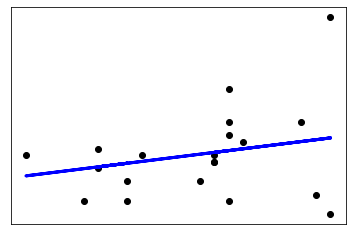

In [559]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# defining features
df_X = df[["MP"]].to_numpy()

# target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

# Plot outputs 
plt.scatter(df_X_test, df_y_test, color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

For MP effect on PTS
Coefficients: 
 [[0.27431401]]
Mean squared error: 41.36
Coefficient of determination: 0.09


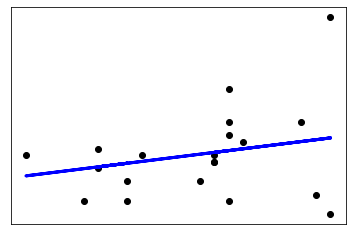

For FG% effect on PTS
Coefficients: 
 [[30.79356153]]
Mean squared error: 38.65
Coefficient of determination: 0.15


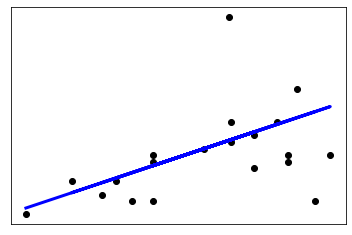

For PTS effect on PTS
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


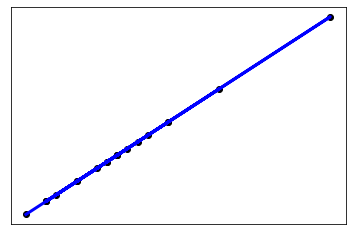

For FT% effect on PTS
Coefficients: 
 [[6.62304807]]
Mean squared error: 41.79
Coefficient of determination: 0.08


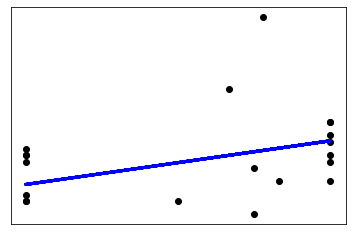

For TRB effect on PTS
Coefficients: 
 [[0.02764538]]
Mean squared error: 45.49
Coefficient of determination: -0.00


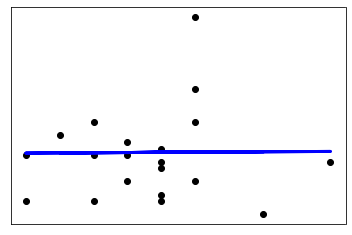

For AST effect on PTS
Coefficients: 
 [[0.14001887]]
Mean squared error: 44.68
Coefficient of determination: 0.01


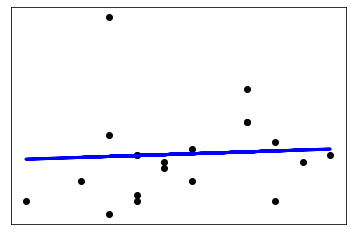

For STL effect on PTS
Coefficients: 
 [[-0.03998533]]
Mean squared error: 45.43
Coefficient of determination: -0.00


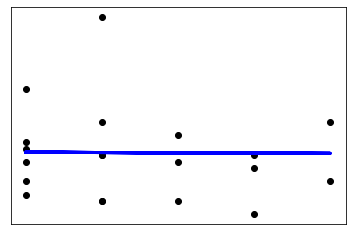

For BLK effect on PTS
Coefficients: 
 [[0.54736842]]
Mean squared error: 45.29
Coefficient of determination: 0.00


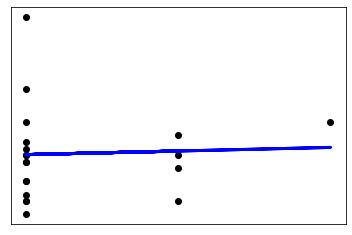

For TOV effect on PTS
Coefficients: 
 [[-0.04946996]]
Mean squared error: 45.86
Coefficient of determination: -0.01


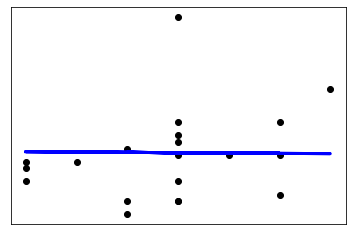

In [560]:
# Checking all features one by one with FOR loop 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

features = ["MP", "FG%", "PTS", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]

for element in features: 
    print("For", element, "effect on PTS")
    # # defining features
    df_X = df[[element]].to_numpy()

    # # target variable
    df_y = df[['PTS']].to_numpy()

    # Split the data into training/testing sets
    df_X_train = df_X[:-20]
    df_X_test = df_X[-20:]

    # Split the targets into training/testing sets
    df_y_train = df_y[:-20]
    df_y_test = df_y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_X_train, df_y_train)

    # Make predictions using the testing set
    df_y_pred = regr.predict(df_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)

    # The mean squared error
    print('Mean squared error: %.2f'
         % mean_squared_error(df_y_test, df_y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
         % r2_score(df_y_test, df_y_pred))

    # Plot outputs 
    plt.scatter(df_X_test, df_y_test, color='black')
    plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [561]:
# Adding more features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "AST", "TRB"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

df

Coefficients: 
 [[4.10732525e-01 3.22548210e+01 1.56172592e-01 5.53746733e-03]]
Mean squared error: 28.48
Coefficient of determination: 0.37


,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,35,0.833,0.667,1,8,1,1,3,27
1,34,0.625,0.500,6,6,0,0,0,15
2,34,0.476,1.000,3,12,1,1,4,28
3,31,0.556,1.000,2,14,2,1,1,16
4,34,0.444,1.000,6,10,4,0,6,13
...,...,...,...,...,...,...,...,...,...
60,28,0.200,0.833,7,8,4,0,3,10
61,26,0.500,0.750,6,7,3,1,0,12
62,33,0.273,1.000,5,4,0,0,0,10
63,36,0.462,1.000,5,11,0,0,3,16


In [562]:
# Adding all the features to predict the target 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# # defining features
df_X = df[["MP", "FG%", "FT%", "TRB", "AST", "STL", "BLK", "TOV"]].to_numpy()

# # target variable
df_y = df[['PTS']].to_numpy()

# Split the data into training/testing sets
df_X_train = df_X[:-20]
df_X_test = df_X[-20:]

# Split the targets into training/testing sets
df_y_train = df_y[:-20]
df_y_test = df_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
     % mean_squared_error(df_y_test, df_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[ 0.46572888 31.62339096  2.98253534  0.06135154  0.12108883  0.1554576
   1.378895   -0.05627934]]
Mean squared error: 28.33
Coefficient of determination: 0.38


In [563]:
# Calculating R-squared score, mean absolute error, and mean squared error for linear regression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("For LINEAR REGRESSION MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, df_y_pred), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, df_y_pred), '\n',
      "R-squared score is:", r2_score(df_y_test, df_y_pred))


For LINEAR REGRESSION MODEL 
Mean absolute error is: 4.0527946606195595 
 Mean squared error is: 28.328030284240878 
 R-squared score is: 0.3753121939634846


Prediction: [16.27289998] vs. Actual: [13]
Prediction: [13.0485045] vs. Actual: [14]
Prediction: [19.04499421] vs. Actual: [17]
Prediction: [17.32956257] vs. Actual: [19]
Prediction: [11.64885525] vs. Actual: [7]
Prediction: [24.64961516] vs. Actual: [19]
Prediction: [19.02584462] vs. Actual: [35]
Prediction: [9.45375893] vs. Actual: [8]
Prediction: [13.37025685] vs. Actual: [13]
Prediction: [19.28927277] vs. Actual: [24]
Prediction: [17.30934377] vs. Actual: [14]
Prediction: [8.15994777] vs. Actual: [15]
Prediction: [15.86897551] vs. Actual: [7]
Prediction: [9.72599049] vs. Actual: [14]
Prediction: [3.45596129] vs. Actual: [7]
Prediction: [5.34048423] vs. Actual: [10]
Prediction: [14.85832839] vs. Actual: [12]
Prediction: [9.41566877] vs. Actual: [10]
Prediction: [17.46846009] vs. Actual: [16]
Prediction: [8.90164207] vs. Actual: [5]


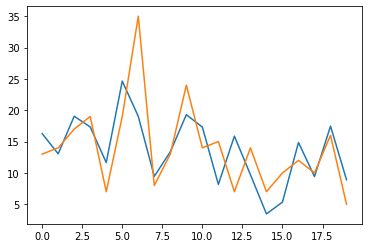

In [564]:
# Printing predicted and actual values

for i in range(len(df_y_test)):
    print("Prediction:", df_y_pred[i], "vs. Actual:", df_y_test[i])

plt.plot(df_y_pred)
plt.plot(df_y_test)

## Statsmodel for Linear Regression

In [565]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [566]:
mod = sm.OLS(df_y, df_X) #describe model
res = mod.fit() #fit model
print(res.summary()) #summarize model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              86.10
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                    5.59e-29
Time:                        14:54:27   Log-Likelihood:                         -187.52
No. Observations:                  65   AIC:                                      391.0
Df Residuals:                      57   BIC:                                      408.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [567]:
res.params

array([ 0.06090355, 24.30627819,  4.33033691,  0.07381981, -0.0887646 ,
       -0.35085601, -0.13575726,  0.21938013])

In [568]:
print("R-squared:", res.rsquared)

R-squared: 0.9235701905943569


In [569]:
# Apply Rainbow test for linearity
sm.stats.linear_rainbow(res)

# first number is an F-statistic and that the second is the p-value

(1.9356979868493598, 0.04823828054944689)

- Z-score calculated from our p-value(0.0482) is 1.66. Since it is lower than 1.96, we cannot deny H0. We can say that there is no difference in the accuracy or performance among the models selected.

## Lasso Model

In [570]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# summarize shape
print(df.shape)
# summarize first few lines
print(df.head())

(65, 9)
   MP    FG%    FT%  TRB  AST  STL  BLK  TOV  PTS
0  35  0.833  0.667    1    8    1    1    3   27
1  34  0.625  0.500    6    6    0    0    0   15
2  34  0.476  1.000    3   12    1    1    4   28
3  31  0.556  1.000    2   14    2    1    1   16
4  34  0.444  1.000    6   10    4    0    6   13


In [571]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 5.432 (1.482)


In [572]:
df.tail(10)

,MP,FG%,FT%,TRB,AST,STL,BLK,TOV,PTS
55,29,0.625,0.000,5,6,1,1,3,14
56,26,0.417,0.000,6,8,0,0,2,15
57,28,0.600,0.000,2,6,1,1,3,7
58,21,0.556,0.000,2,6,1,0,5,14
59,25,0.300,0.000,4,2,2,0,2,7
60,28,0.200,0.833,7,8,4,0,3,10
61,26,0.500,0.750,6,7,3,1,0,12
62,33,0.273,1.000,5,4,0,0,0,10
63,36,0.462,1.000,5,11,0,0,3,16
64,42,0.125,0.750,9,5,3,0,2,5


In [573]:
df_y_test

array([[13],
       [14],
       [17],
       [19],
       [ 7],
       [19],
       [35],
       [ 8],
       [13],
       [24],
       [14],
       [15],
       [ 7],
       [14],
       [ 7],
       [10],
       [12],
       [10],
       [16],
       [ 5]], dtype=int64)

In [574]:
#define model 
model = Lasso(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
yhat = model.predict(df_X_test)
yhat

array([14.28090141, 14.54903954, 14.45558749, 14.67903594, 14.72372563,
       15.99936326, 16.30404575, 16.08466997, 14.50434985, 14.67903594,
       12.91588439, 12.21306738, 12.65181893, 10.80336067, 11.68086377,
       12.74119831, 12.16837769, 13.88276687, 14.98779109, 16.30404575])

Prediction: 14.280901405595177 vs. Actual: [13]
Prediction: 14.549039544458006 vs. Actual: [14]
Prediction: 14.455587490901197 vs. Actual: [17]
Prediction: 14.679035939953552 vs. Actual: [19]
Prediction: 14.723725629764024 vs. Actual: [7]
Prediction: 15.999363264588359 vs. Actual: [19]
Prediction: 16.304045745389928 vs. Actual: [35]
Prediction: 16.084669970273435 vs. Actual: [8]
Prediction: 14.504349854647534 vs. Actual: [13]
Prediction: 14.679035939953552 vs. Actual: [24]
Prediction: 12.915884391149898 vs. Actual: [14]
Prediction: 12.213067375989958 vs. Actual: [15]
Prediction: 12.651818926222937 vs. Actual: [7]
Prediction: 10.803360671734207 vs. Actual: [14]
Prediction: 11.68086377220017 vs. Actual: [7]
Prediction: 12.74119830584388 vs. Actual: [10]
Prediction: 12.168377686179486 vs. Actual: [12]
Prediction: 13.882766871236802 vs. Actual: [10]
Prediction: 14.987791094690985 vs. Actual: [16]
Prediction: 16.304045745389928 vs. Actual: [5]


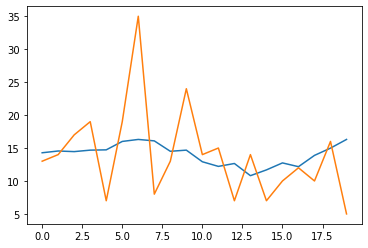

In [575]:
for i in range(len(df_y_test)):
    print("Prediction:", yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(yhat)
plt.plot(df_y_test)

In [576]:
print("For LASSO MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, yhat))

For LASSO MODEL 
Mean absolute error is: 4.676729289872986 
 Mean squared error is: 41.21147354872457 
 R-squared score is: 0.09120737529688361


## Ridge Regression Model

In [577]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

data = df.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.056 (1.183)


In [578]:
data = df.values
X, y = data[:, :-1], data[:, -1]
#define model 
model = Ridge(alpha=1.0)

#fit model
model.fit(X, y)

# define new data 
ridge_yhat = model.predict(df_X_test)
ridge_yhat

array([14.05024789, 14.29698649, 17.53351548, 16.80640846, 12.87588858,
       20.76224764, 18.47665755, 11.69255041, 14.42570603, 18.60075332,
       14.01372159,  9.23016572, 13.02982294, 10.01407866,  6.01363757,
        8.8286562 , 13.03055789, 12.57287936, 17.74899838, 11.90152173])

Prediction: 14.050247894569207 vs. Actual: [13]
Prediction: 14.296986494911387 vs. Actual: [14]
Prediction: 17.53351547825778 vs. Actual: [17]
Prediction: 16.80640845843265 vs. Actual: [19]
Prediction: 12.875888579451747 vs. Actual: [7]
Prediction: 20.762247637516232 vs. Actual: [19]
Prediction: 18.476657552854558 vs. Actual: [35]
Prediction: 11.692550406779901 vs. Actual: [8]
Prediction: 14.425706033539353 vs. Actual: [13]
Prediction: 18.600753316502242 vs. Actual: [24]
Prediction: 14.013721590298612 vs. Actual: [14]
Prediction: 9.230165719083097 vs. Actual: [15]
Prediction: 13.029822944850903 vs. Actual: [7]
Prediction: 10.0140786628669 vs. Actual: [14]
Prediction: 6.013637569523448 vs. Actual: [7]
Prediction: 8.828656199997415 vs. Actual: [10]
Prediction: 13.030557887362097 vs. Actual: [12]
Prediction: 12.572879355181048 vs. Actual: [10]
Prediction: 17.74899837796856 vs. Actual: [16]
Prediction: 11.901521733279026 vs. Actual: [5]


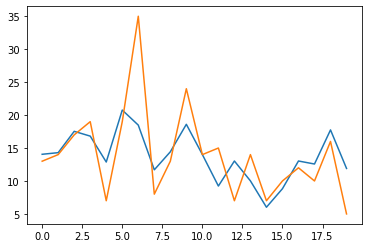

In [579]:
for i in range(len(df_y_test)):
    print("Prediction:", ridge_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(ridge_yhat)
plt.plot(df_y_test)

In [580]:
print("For RIDGE MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, ridge_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, ridge_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, ridge_yhat))

For RIDGE MODEL 
Mean absolute error is: 3.448214346735277 
 Mean squared error is: 25.40068930733076 
 R-squared score is: 0.4398657190069847


## Random Forest Model

In [581]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.23.1


- The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [582]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

data = df.values
X, y = data[:, :-1], data[:, -1]
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores = absolute(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 3.684 (1.102)


In [583]:
# Making predictions
# fit the model on the whole dataset
model.fit(X, y)

# putting new row from test dataset
random_yhat = model.predict(df_X_test)
random_yhat

array([14.06, 12.19, 19.23, 18.08,  8.35, 20.04, 28.87,  8.94, 12.85,
       21.48, 12.76, 14.  , 10.15, 12.73,  7.02,  9.85, 12.83,  9.37,
       17.09,  4.82])

Prediction: 14.06 vs. Actual: [13]
Prediction: 12.19 vs. Actual: [14]
Prediction: 19.23 vs. Actual: [17]
Prediction: 18.08 vs. Actual: [19]
Prediction: 8.35 vs. Actual: [7]
Prediction: 20.04 vs. Actual: [19]
Prediction: 28.87 vs. Actual: [35]
Prediction: 8.94 vs. Actual: [8]
Prediction: 12.85 vs. Actual: [13]
Prediction: 21.48 vs. Actual: [24]
Prediction: 12.76 vs. Actual: [14]
Prediction: 14.0 vs. Actual: [15]
Prediction: 10.15 vs. Actual: [7]
Prediction: 12.73 vs. Actual: [14]
Prediction: 7.02 vs. Actual: [7]
Prediction: 9.85 vs. Actual: [10]
Prediction: 12.83 vs. Actual: [12]
Prediction: 9.37 vs. Actual: [10]
Prediction: 17.09 vs. Actual: [16]
Prediction: 4.82 vs. Actual: [5]


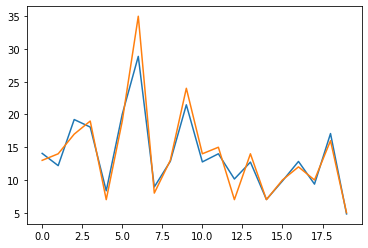

In [584]:
for i in range(len(df_y_test)):
    print("Prediction:", random_yhat[i], "vs. Actual:", df_y_test[i])

plt.plot(random_yhat)
plt.plot(df_y_test)

In [585]:
print("For RANDOM FOREST MODEL", '\n'
      "Mean absolute error is:", mean_absolute_error(df_y_test, random_yhat), '\n',
      "Mean squared error is:", mean_squared_error(df_y_test, random_yhat), '\n',
      "R-squared score is:", r2_score(df_y_test, random_yhat))

For RANDOM FOREST MODEL 
Mean absolute error is: 1.3855000000000002 
 Mean squared error is: 3.7179349999999998 
 R-squared score is: 0.9180123490820883
